Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 384, 128, 128)     6528      
_________________________________________________________________
leaky_re_lu_124 (LeakyReLU)  (None, 384, 128, 128)     0         
_________________________________________________________________
conv2d_transpose_46 (Conv2DT (None, 384, 128, 64)      204864    
_________________________________________________________________
leaky_re_lu_125 (LeakyReLU)  (None, 384, 128, 64)      0         
_________________________________________________________________
conv2d_transpose_47 (Conv2DT (None, 384, 128, 64)      102464    
_________________________________________________________________
leaky_re_lu_126 (LeakyReLU)  (None, 384, 128, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 384, 128, 64)     

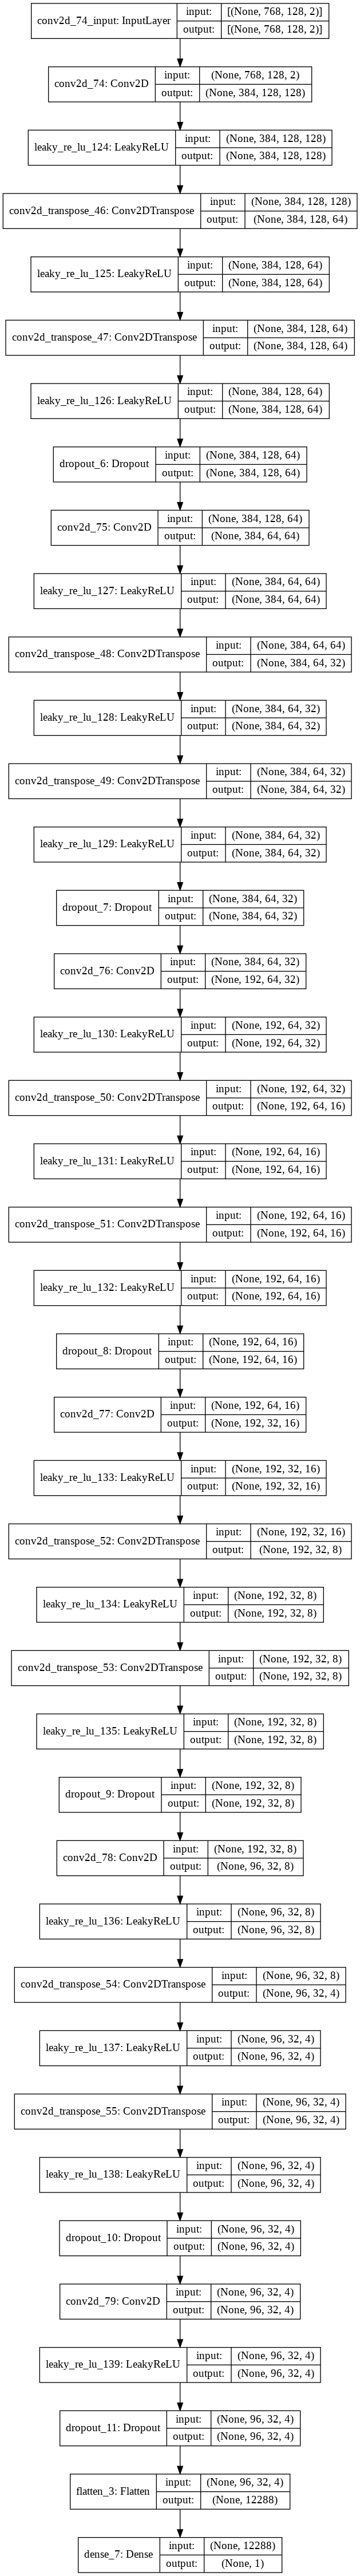

In [8]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Conv3D
from keras.layers import Conv2DTranspose
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(768,128,2)):
    dropout = 0.3

    model = Sequential()
    model.add(Conv2D(128, (5,5), strides=(2, 1), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(64, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(64, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))

    model.add(Conv2D(64, (5,5), strides=(1, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(32, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(32, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))

    model.add(Conv2D(32, (5,5), strides=(2, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(16, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(16, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))

    model.add(Conv2D(16, (5,5), strides=(1, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(8, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(8, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))

    model.add(Conv2D(8, (5,5), strides=(2, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(4, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(4, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))

    model.add(Conv2D(4, (5,5), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def define_discriminator2(in_shape=(1024,128,2)):
    model = Sequential()
    model.add(Conv2D(64, (5,5), strides=(1, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(64, (5,5), strides=(2, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(64, (5,5), strides=(2, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(64, (3,3), strides=(1, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 49152)             14794752  
_________________________________________________________________
leaky_re_lu_75 (LeakyReLU)   (None, 49152)             0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 96, 32, 16)        0         
_________________________________________________________________
conv2d_transpose_24 (Conv2DT (None, 192, 32, 256)      102656    
_________________________________________________________________
leaky_re_lu_76 (LeakyReLU)   (None, 192, 32, 256)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 192, 32, 256)      1638656   
_________________________________________________________________
leaky_re_lu_77 (LeakyReLU)   (None, 192, 32, 256)     

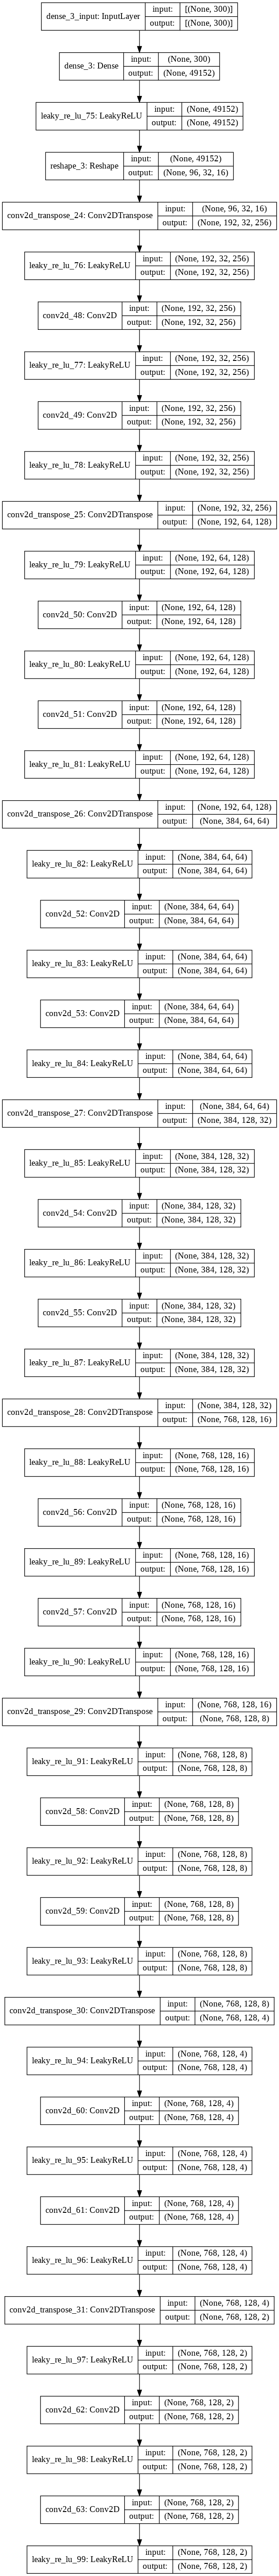

In [4]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Conv3DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  # foundation for 7x7 image
  n_nodes = 96 * 32 * 16
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((96, 32, 16)))


  channels_layer_1 = 256
  model.add(Conv2DTranspose(channels_layer_1, (5,5), strides=(2,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(channels_layer_1, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(channels_layer_1, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))


  channels_layer_2 = 128
  model.add(Conv2DTranspose(channels_layer_2, (5,5), strides=(1,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(channels_layer_2, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(channels_layer_2, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))


  channels_layer_3 = 64
  model.add(Conv2DTranspose(channels_layer_3, (5,5), strides=(2,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(channels_layer_3, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(channels_layer_3, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))


  channels_layer_4 = 32
  model.add(Conv2DTranspose(channels_layer_4, (5,5), strides=(1,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(channels_layer_4, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(channels_layer_4, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))


  channels_layer_5 = 16
  model.add(Conv2DTranspose(channels_layer_5, (5,5), strides=(2,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(channels_layer_5, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(channels_layer_5, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))


  #at this point we have the desired size of (768,128), we just need to cut down the channels to 2
  channels_layer_6 = 8
  model.add(Conv2DTranspose(channels_layer_6, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(channels_layer_6, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(channels_layer_6, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))


  channels_layer_7 = 4
  model.add(Conv2DTranspose(channels_layer_7, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(channels_layer_7, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(channels_layer_7, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))


  channels_layer_8 = 2
  model.add(Conv2DTranspose(channels_layer_8, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(channels_layer_8, (5,5), strides=(1,1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(channels_layer_8, (5,5), strides=(1,1), activation='sigmoid', padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  return model

# define the size of the latent space
latent_dim = 300
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)